In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# single_data_point = np.random.randint(0,100,2)
# single_label = np.random.randint(0,2)
# print(single_data_point, '\n--------\n', single_label)

# generate_data
随机生成0-100之间的坐标点，默认维度2，和对应标签

In [26]:
def generate_data(num_samples, num_features=2):
    """
    generate data between 0 and 100,
    and it's label.
    :param num_samples:
    :param num_features:
    :return:
    """
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size=data_size)
    label_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=label_size)
    return data.astype(np.float32), labels

In [27]:
# test
# 生成n个点（坐标），及对应标签
train_data, labels = generate_data(11)

[[80. 53.]
 [85. 15.]
 [10.  1.]
 [56.  9.]
 [ 1. 50.]
 [49. 19.]
 [35. 12.]
 [99. 61.]
 [74. 49.]
 [52. 86.]
 [68. 49.]] 
--------
 [[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


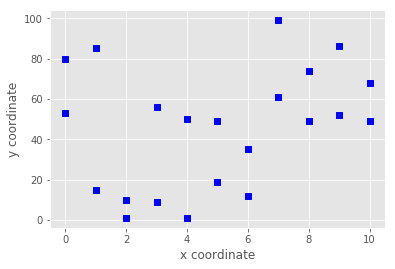

In [28]:
print(train_data, '\n--------\n', labels)
plt.plot(train_data, 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

# plot_data
使用matplotlib显示图形：


In [29]:
def plot_data(all_blue, all_red):
    """
    the data with label 0, scatter blue,  square
    the data with label 1, scatter red, triangle
    :param all_blue:
    :param all_red:
    :return:
    """
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')
    plt.title('k-nn samples')

## 将生成的点按标签（0,1）分为蓝点、红点
- label==0，蓝色点
- label==1，红色点

In [30]:
# labels.ravel() 将多维数组降位一维 [0 1 0 1 0 0 0 1 1 0 1]
blue = train_data[labels.ravel() == 0]
red =train_data[labels.ravel() == 1]

# sklearn——knn分类器

In [31]:
#  KNN分类器
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_data, labels)

/home/tarena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
#生成新点
newcomer, _ = generate_data(1)
print(newcomer)

[[56. 76.]]


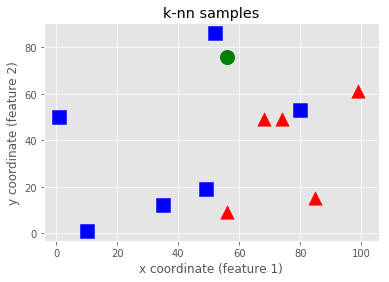

In [33]:
# 显示图像
plot_data(blue, red)
plt.plot(newcomer[0,0], newcomer[0,1], 'go', markersize=14)
plt.show()

In [34]:
# 预测分类
rst = knn.predict(newcomer)
print("Predicted label:\t", rst)

Predicted label:	 [0]


# opencv——knn分类器

In [35]:
import cv2
#  KNN分类器
knn_cv2 = cv2.ml.KNearest_create()
knn_cv2.train(train_data, cv2.ml.ROW_SAMPLE, labels)
#生成新点
newcomer, _ = generate_data(1)
print(newcomer)

[[53. 22.]]


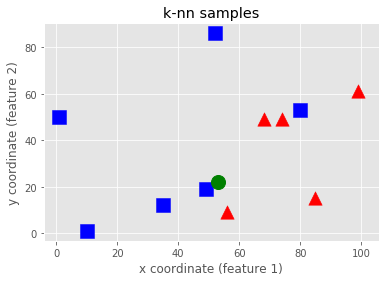

In [36]:
# 显示图像
plot_data(blue, red)
plt.plot(newcomer[0,0], newcomer[0,1], 'go', markersize=14)
plt.show()

In [45]:
ret, result, neighbors, dist = knn_cv2.findNearest(newcomer, 5)  # 注意：选择适当的数；不要选择偶数，以免平局。
print("Predicted label:\t", result)
print("Neighbors label:\t", neighbors)
print("Distance to neighbors:\t", dist)

Predicted label:	 [[1.]]
Neighbors label:	 [[0. 1. 0. 1. 1.]]
Distance to neighbors:	 [[  25.  178.  424.  954. 1073.]]
